In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#load the data
heart_data = pd.read_csv('heart.csv')
print(heart_data)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffW

**BASIC INFORMATION ABOUT DATASET**

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,0,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,0,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,0,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,0,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,0,0,1,4,8.0,0,0,0


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,1,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,1,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,1,0,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,1,0,0,3,12.0,0,0,0
319794,0,46.56,0,0,0,0.0,0.0,0,0,13,1,0,1,3,8.0,0,0,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(319795, 18)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [7]:
# checking for missing values
heart_data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,7.514536,0.514048,0.194002,0.775362,3.595028,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.107419,0.496776,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,3.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,13.000000,5.000000,3.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000


***DATA VISUALIZATION***










1.   **PIE CHART**




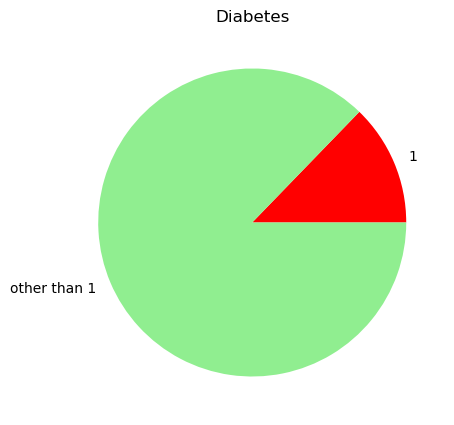

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
heart_data = pd.read_csv('heart.csv');
labels = '1', 'other than 1'
sizes = [(heart_data['Diabetic'] == 1).sum(), (heart_data['Diabetic'] != 1).sum()]
colors = ['red', 'lightgreen']

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sizes,labels = labels, colors=colors)

plt.title('Diabetes')
plt.show()





2.  **BAR GRAPH**



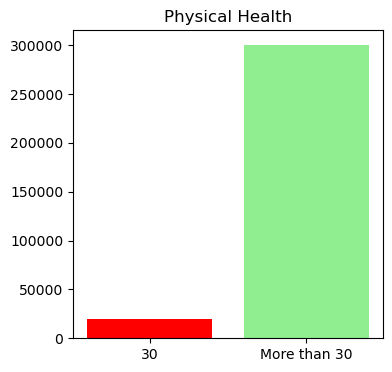

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
heart_data = pd.read_csv('heart.csv');
labels = ['30', 'More than 30']
sizes = [(heart_data['PhysicalHealth'] == 30).sum(), (heart_data['PhysicalHealth'] != 30).sum()]
colors = ['red', 'lightgreen']

x = [0,1]
fig,ax = plt.subplots(figsize=(4,4))
ax.bar(x, sizes, color=colors, align='center')
plt.xticks(x,labels)

plt.title('Physical Health')
plt.show()


**3. HEATMAP**



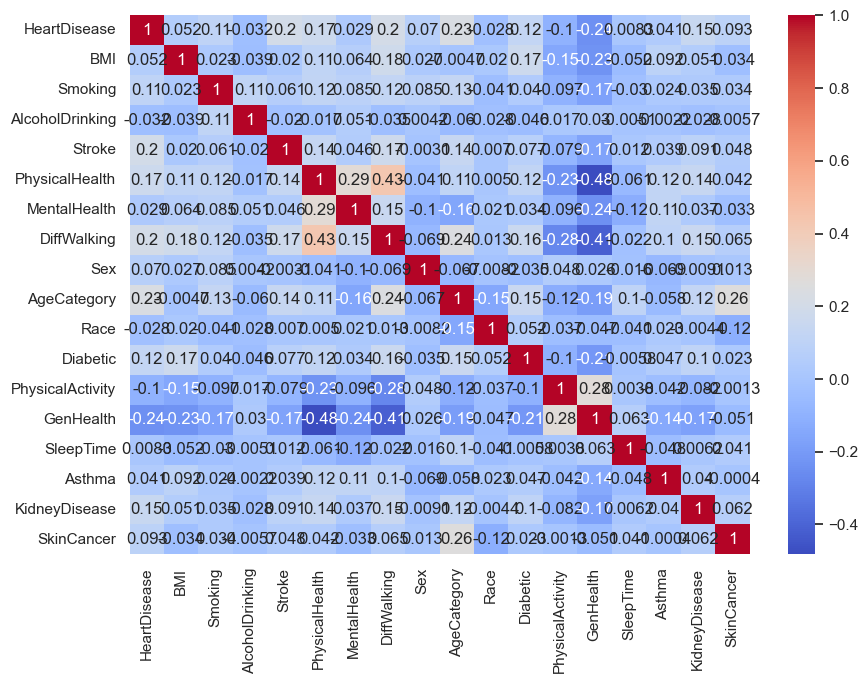

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csv('heart.csv');

sns.set(rc={"figure.figsize":(10,7)})
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm")
plt.show()

4. **HISTOGRAM**



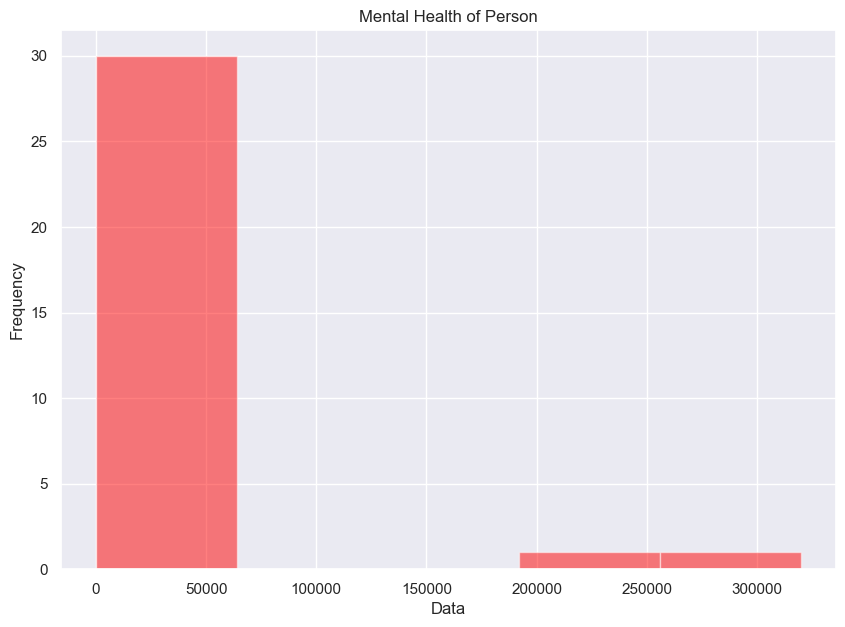

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csv('heart.csv');
heart_data_new = pd.crosstab(index=heart_data['MentalHealth'], columns=['MentalHealth'], margins=True)
plt.hist(heart_data_new['MentalHealth'], bins=5, color='red', alpha=0.5)
plt.title('Mental Health of Person')
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.show()

5. **CONTINGENCY TABLE**



In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

heart_data = pd.read_csv('heart.csv');
pd.crosstab(index=heart_data['PhysicalHealth'], columns=heart_data['MentalHealth'])

MentalHealth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
PhysicalHealth,,,,,,,,,,,,,,,,,,,,,
0.0,162928,5791,10876,6732,3274,8749,784,3249,597,96,...,150,40,28,29,796,19,48,220,134,7219
1.0,4998,1084,882,628,312,642,85,253,47,9,...,12,1,4,1,66,0,4,25,16,365
2.0,7119,821,1334,641,524,1003,128,467,89,13,...,24,3,5,3,117,3,10,37,18,651
3.0,4010,399,583,572,216,557,83,281,57,9,...,12,6,3,2,75,2,8,23,14,505
4.0,2069,137,351,172,228,184,79,154,35,8,...,4,4,3,3,51,1,7,13,7,302
5.0,3550,250,505,332,106,671,54,178,55,12,...,9,3,2,2,112,2,3,17,13,466
6.0,576,41,89,67,36,46,61,24,14,2,...,1,2,1,0,13,2,1,5,2,81
7.0,2342,114,253,214,103,149,18,292,15,6,...,17,0,2,3,40,2,4,11,2,406
8.0,426,30,53,37,33,49,14,13,31,3,...,0,0,0,0,10,1,2,4,2,60


In [14]:
# checking the distribution of Target Variable
heart_data['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

**SPLITTING FEATURES AND TARGET**

In [15]:
#Splitting the Features and Target
X = heart_data.drop(columns='HeartDisease', axis=1)
Y = heart_data['HeartDisease']

In [16]:
print(X)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0       16.60        1                0       0             3.0          30.0   
1       20.34        0                0       1             0.0           0.0   
2       26.58        1                0       0            20.0          30.0   
3       24.21        0                0       0             0.0           0.0   
4       23.71        0                0       0            28.0           0.0   
...       ...      ...              ...     ...             ...           ...   
319790  27.41        1                0       0             7.0           0.0   
319791  29.84        1                0       0             0.0           0.0   
319792  24.24        0                0       0             0.0           0.0   
319793  32.81        0                0       0             0.0           0.0   
319794  46.56        0                0       0             0.0           0.0   

        DiffWalking  Sex  A

In [17]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64


In [18]:
#Splitting the Data into Training data & Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(319795, 17) (255836, 17) (63959, 17)


**MODEL TRAINING**

**LOGISITC REGRESSION**

In [20]:
#model training  LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\akshj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9154419237323911


In [23]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2,1,4,5,9)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\akshj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**NAVIE BAYES** 
model prediction and accuracy
---



In [24]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb.fit(X_train, Y_train)

GaussianNB()

In [25]:
# accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [26]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8447364718022483


In [27]:
input_data = (99,0,0,140,268,0,0,160,0,3,8,9,12,9,67,9,9)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = nb.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\akshj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**RandomForestClassifier**


MODEL ACCURACY AND PREDICTION
---



In [28]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [29]:
from sklearn.metrics import accuracy_score
X_test_prediction_rfr = regressor.predict(X_test)
accuracy_rfr = accuracy_score(X_test_prediction_rfr, Y_test)
print(" Random Forest Classifier: " + str(accuracy_rfr * 100))

 Random Forest Classifier: 90.62680779874607


In [30]:
input_data = (2,12,2,1,2,52,2,2,2,2,2,2,2,2,2,2,7)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\akshj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**DECISION TREE CLASSIFIER**

MODEL ACCURACY AND PREDICTION
---




In [31]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [32]:
from sklearn.metrics import accuracy_score
X_test_prediction_dec = dectree.predict(X_test)
accuracy_dec = accuracy_score(X_test_prediction_dec, Y_test)
print(" Decision Tree Classifier: " + str(accuracy_dec * 100))

 Decision Tree Classifier: 86.7743398114417


In [33]:
input_data = (2,12,2,1,2,52,8,9,12,8,7,45,89,0,7,4,6)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dectree.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\akshj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
import pickle
# Writing different model files to file
with open( 'heart.sav', 'wb') as f:
    pickle.dump(model,f)